<a href="https://colab.research.google.com/github/22zunaid/Data-science/blob/master/Stockprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
#install the dependencies
import pandas as pd
import numpy as np 
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [65]:
#store the data into the dataframe
df = pd.read_csv('TTM.csv')
df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-02-03,11.54,11.69,11.40,11.68,11.68,2503100
1,2020-02-04,11.78,11.88,11.69,11.73,11.73,1757500
2,2020-02-05,12.82,12.90,12.60,12.64,12.64,2380700
3,2020-02-06,12.73,12.73,12.32,12.36,12.36,2399900
4,2020-02-07,12.08,12.08,11.85,11.91,11.91,1851000
5,2020-02-10,11.80,11.81,11.70,11.81,11.81,1284400


In [66]:
#get the number of trading days
df.shape

(254, 7)

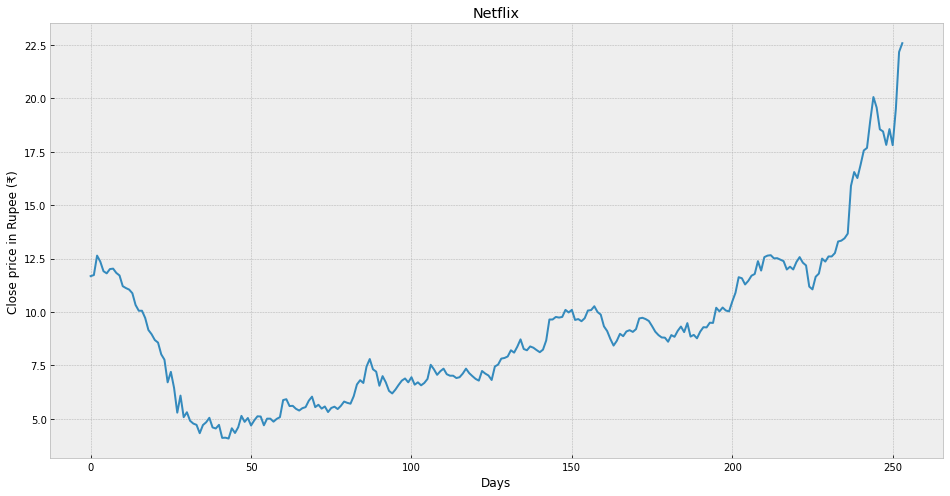

In [67]:
#visualize the close price data
plt.figure(figsize=(16,8))
plt.title('Netflix')
plt.xlabel('Days')
plt.ylabel('Close price in Rupee (₹)')
plt.plot(df['Close'])
plt.show()

In [68]:
#get the close price
df = df[['Close']]
df.head(4)

,Close
0,11.68
1,11.73
2,12.64
3,12.36


In [69]:
#create the variable to predict 'x' days out into the future 
future_days = 25
#create a new column (target) shifted 'x' units/days up
df['Prediction'] = df[['Close']].shift(-future_days) 
df.tail(4)

,Close,Prediction
250,17.809999,NaN
251,19.520000,NaN
252,22.170000,NaN
253,22.580000,NaN


In [70]:
#create the feature data set (X) and convert it to a numpy array and remove  the last 'x' rows/days
X = np.array(df.drop(['Prediction'] ,1))[:-future_days]
print(X)

[[11.68]
 [11.73]
 [12.64]
 [12.36]
 [11.91]
 [11.81]
 [12.01]
 [12.03]
 [11.83]
 [11.71]
 [11.21]
 [11.12]
 [11.05]
 [10.88]
 [10.33]
 [10.06]
 [10.06]
 [ 9.72]
 [ 9.16]
 [ 8.96]
 [ 8.69]
 [ 8.57]
 [ 8.02]
 [ 7.77]
 [ 6.71]
 [ 7.2 ]
 [ 6.45]
 [ 5.29]
 [ 6.09]
 [ 5.08]
 [ 5.31]
 [ 4.91]
 [ 4.78]
 [ 4.72]
 [ 4.33]
 [ 4.71]
 [ 4.84]
 [ 5.05]
 [ 4.6 ]
 [ 4.55]
 [ 4.72]
 [ 4.11]
 [ 4.12]
 [ 4.08]
 [ 4.56]
 [ 4.34]
 [ 4.61]
 [ 5.14]
 [ 4.86]
 [ 5.04]
 [ 4.69]
 [ 4.93]
 [ 5.12]
 [ 5.11]
 [ 4.7 ]
 [ 5.01]
 [ 5.01]
 [ 4.87]
 [ 5.  ]
 [ 5.08]
 [ 5.88]
 [ 5.92]
 [ 5.6 ]
 [ 5.61]
 [ 5.47]
 [ 5.39]
 [ 5.5 ]
 [ 5.55]
 [ 5.85]
 [ 6.04]
 [ 5.55]
 [ 5.66]
 [ 5.48]
 [ 5.58]
 [ 5.32]
 [ 5.51]
 [ 5.57]
 [ 5.46]
 [ 5.61]
 [ 5.81]
 [ 5.75]
 [ 5.71]
 [ 6.06]
 [ 6.61]
 [ 6.81]
 [ 6.68]
 [ 7.45]
 [ 7.8 ]
 [ 7.32]
 [ 7.21]
 [ 6.55]
 [ 7.  ]
 [ 6.71]
 [ 6.31]
 [ 6.19]
 [ 6.37]
 [ 6.59]
 [ 6.79]
 [ 6.89]
 [ 6.71]
 [ 6.95]
 [ 6.6 ]
 [ 6.71]
 [ 6.57]
 [ 6.68]
 [ 6.87]
 [ 7.53]
 [ 7.32]
 [ 7.06]
 [ 7.23]
 [ 7.35]
 

In [72]:
#create the target data set (y) and convert  it to a numpy array and get all of the target values except  the last 'x' rows/days
y = np.array(df['Prediction'])[:-future_days]
print(y)

[ 7.2       6.45      5.29      6.09      5.08      5.31      4.91
  4.78      4.72      4.33      4.71      4.84      5.05      4.6
  4.55      4.72      4.11      4.12      4.08      4.56      4.34
  4.61      5.14      4.86      5.04      4.69      4.93      5.12
  5.11      4.7       5.01      5.01      4.87      5.        5.08
  5.88      5.92      5.6       5.61      5.47      5.39      5.5
  5.55      5.85      6.04      5.55      5.66      5.48      5.58
  5.32      5.51      5.57      5.46      5.61      5.81      5.75
  5.71      6.06      6.61      6.81      6.68      7.45      7.8
  7.32      7.21      6.55      7.        6.71      6.31      6.19
  6.37      6.59      6.79      6.89      6.71      6.95      6.6
  6.71      6.57      6.68      6.87      7.53      7.32      7.06
  7.23      7.35      7.09      7.02      7.02      6.91      6.95
  7.12      7.35      7.14      7.        6.87      6.79      7.24
  7.12      7.03      6.82      7.45      7.54      7.82      7.85

In [74]:
#split the data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.25 )

In [75]:
#create the models
#create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
#create the linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [76]:
#get the last 'x' rows  of the features data sets 
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[11.29],
       [11.46],
       [11.7 ],
       [11.78],
       [12.38],
       [11.94],
       [12.57],
       [12.64],
       [12.66],
       [12.51],
       [12.52],
       [12.45],
       [12.38],
       [11.99],
       [12.12],
       [11.99],
       [12.34],
       [12.57],
       [12.31],
       [12.18],
       [11.19],
       [11.06],
       [11.65],
       [11.8 ],
       [12.5 ]])

In [77]:
#show the model tree predcition
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
#show the linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[12.36      12.6       12.6       12.76      15.4299995 13.34
 22.58       9.48      15.9       22.58      22.58      16.889999
 15.4299995 17.68      18.940001  17.68       6.09      22.58
 18.450001  17.82      18.559999   5.05       7.2        5.31
 22.58     ]

[10.807879   10.93265702 11.10881422 11.16753329 11.60792629 11.28497142
 11.74738408 11.79876326 11.81344303 11.70334478 11.71068466 11.65930547
 11.60792629 11.32167084 11.41708932 11.32167084 11.57856676 11.74738408
 11.55654711 11.46112862 10.73448017 10.63906168 11.0721148  11.18221305
 11.69600489]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


<function matplotlib.pyplot.show>

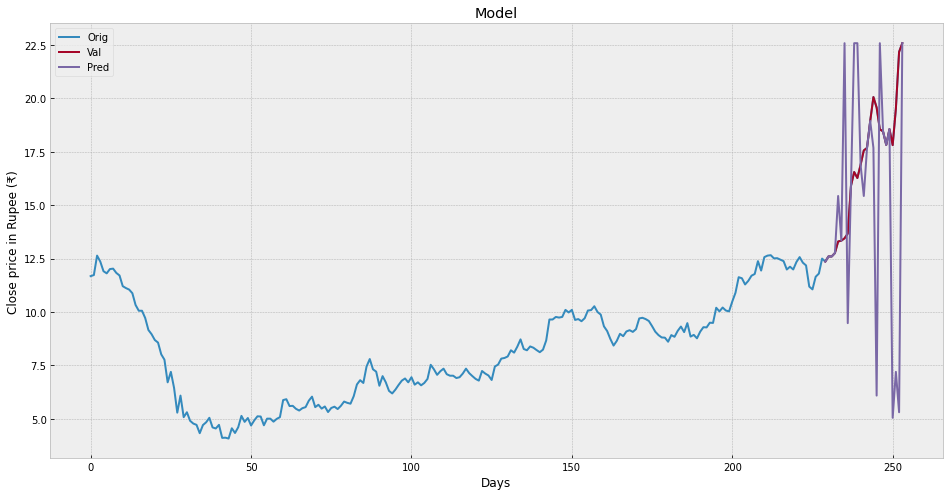

In [79]:
#visualize the data (decision tree)
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Prediction'] = predictions
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close price in Rupee (₹)')
plt.plot(df['Close'])
plt.plot(valid[['Close' , 'Prediction']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


<function matplotlib.pyplot.show>

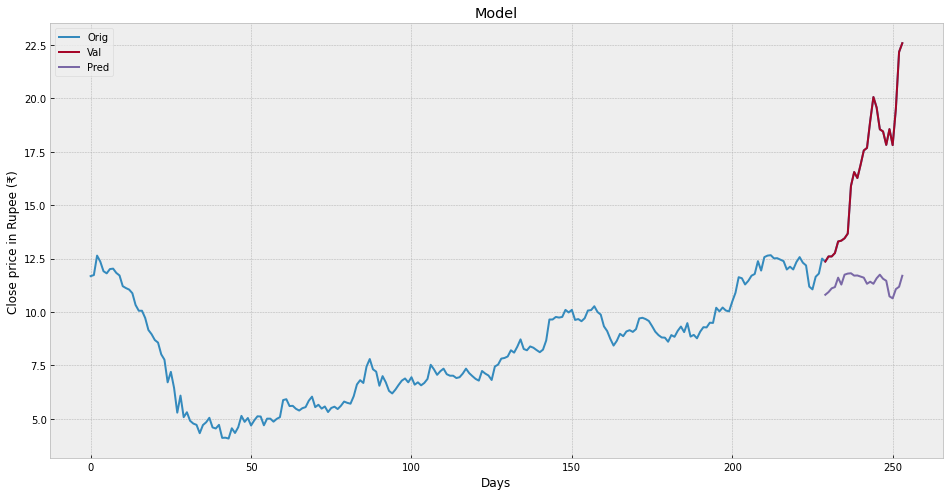

In [80]:
#visualize the data (linear regression)
predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Prediction'] = predictions
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close price in Rupee (₹)')
plt.plot(df['Close'])
plt.plot(valid[['Close' , 'Prediction']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show